# Netflix Bussiness case

In [1]:
# Data Analysis and Visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extracting data from data set
raw_data = pd.read_csv("netflix.csv")

In [3]:
raw_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df = raw_data.copy()

In [5]:
# No of rows and columns
df.shape

(8807, 12)

# Unnesting & Data Cleaning

In [6]:
# Unnesting Categorical Columns in DataFrame
un_nest = ['director', 'cast','country', 'listed_in']

for column in un_nest:
    df[column] = df[column].str.split(', ')
    df = df.explode(column)

In [7]:
# NaN or null values in each column
df.isnull().sum()

show_id             0
type                0
title               0
director        50643
cast             2146
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

In [8]:
# Fill missing values in the "director" column with "unknown_director"
df["director"].fillna("unknown_director", inplace=True)

# Fill missing values in the "cast" column with "unknown_cast"
df["cast"].fillna("unknown_cast", inplace=True)

# Fill missing values in the "country" column with "unknown_country"
df["country"].fillna("unknown_country", inplace=True)

In [9]:
# Coverting date_added to date format
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce', format='%B %d, %Y')

# %B: Full month name, e.g., "January"
# %d: Day of the month as a zero-padded decimal number, e.g., "01",
# %Y: Year with century as a decimal number, e.g., "2017", 

# Calculate the mode of the "date_added" column
mode_date_added = df["date_added"].mode()[0]

# Fill missing values in the "date_added" column with the calculated mode
df["date_added"].fillna(mode_date_added, inplace=True)

In [10]:
print(df["date_added"].dtype)

datetime64[ns]


In [11]:
# Fill missing values in the "rating" column with "unknown_rating"
df["rating"].fillna("unknown_rating", inplace = True)

In [12]:
# Missing values in duration column
df.loc[df["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [13]:
# Filling Missing Values in the "duration" Column based on "rating"
df.loc[df["duration"].isnull(),"duration"] = df.loc[df["duration"].isnull(), "rating"]

# Filling "Min" values with "unknown_rating" in rating column
df.loc[df["director"] =="Louis C.K.","rating"]="unknown_rating"

In [14]:
df.loc[df["director"] =="Louis C.K."]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,unknown_rating,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,unknown_rating,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,unknown_rating,66 min,Movies,The comic puts his trademark hilarious/thought...


In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
# No.of columns after unnesting and data cleaning
df.shape

(201991, 12)

In [17]:
# separating the data into two bins

# Filter data for movies
movie_data = df[df["type"]=="Movie"]

# Reset the index for the movie data
movie_data = movie_data.reset_index(drop = True)

# Filter data for TV shows
tvshow_data = df[df["type"] == "TV Show"]

# Reset the index for the TV show data
tvshow_data = tvshow_data.reset_index(drop=True)

# Counts of categorical variable

In [18]:
# Count of movies and Tv shows
mcount = movie_data['show_id'].nunique()
tvcount = tvshow_data['show_id'].nunique()

print(f"Movies count - {mcount}")
print(f"TV shows count - {tvcount}")

Movies count - 6131
TV shows count - 2676


In [19]:
data = {'Type': ['Movies', 'TV Shows'], 'Count': [mcount, tvcount]}
df_count = pd.DataFrame(data)

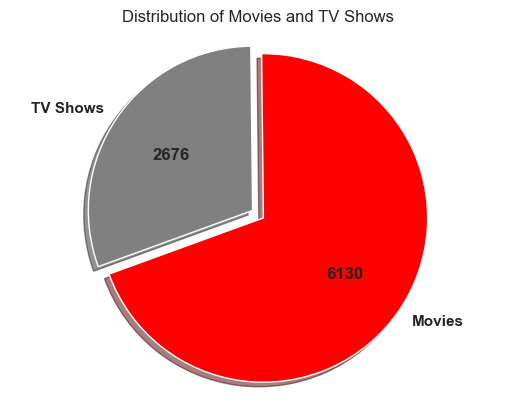

In [20]:
# Distribution of movies & Tv shows in a pie chart
sns.set_theme(style="whitegrid")

plt.pie(df_count['Count'],
        labels=df_count['Type'],
        startangle=200,
        explode=(0.08, 0),
        colors=['red', 'grey'],
        shadow=True,
        autopct=lambda p: f'{int(p * sum(df_count["Count"]) / 100)}',
        textprops={'fontweight': 'bold'})

plt.title('Distribution of Movies and TV Shows')
plt.axis("equal")  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

**Insights:**

- The dataset contains a larger number of movies (6131) compared to TV shows (2676), indicating that movies are more prevalent on Netflix.<br><br>

- Netflix has a diverse library with both movies and TV shows, offering a wide range of movie content for its audience.<br><br>

- The higher count of movies may suggest that Netflix caters to a larger audience interested in on-demand movie content.

In [21]:
# Movies and Tv Shows released by each director
director_count_movie = df[df["director"] != "unknown_director"].groupby("director")["show_id"].nunique().sort_values(ascending=False)

director_count_movie = director_count_movie.reset_index()

director_count_movie

,director,show_id
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
...,...,...
4988,Jovanka Vuckovic,1
4989,Bradley Walsh,1
4990,Juan Antin,1
4991,Juan Antonio de la Riva,1


In [22]:
# Movies and Tv Shows released in each country
country_count = df.groupby("country")["show_id"].nunique().sort_values(ascending=False)

country_count = country_count.reset_index()

country_count

,country,show_id
0,United States,3689
1,India,1046
2,unknown_country,831
3,United Kingdom,804
4,Canada,445
...,...,...
123,Mongolia,1
124,Somalia,1
125,Ethiopia,1
126,Botswana,1


In [23]:
def create_countplot(data, x, y, title, color, width, label, xlabel, ylabel, legend_loc='upper right', rotation=30):
    
    # Set the seaborn theme
    sns.set_theme(style="whitegrid")

    # Create a new figure with a specified size
    plt.figure(figsize=(15, 9))

    # Create a bar plot using seaborn
    countplot = sns.barplot(data=data, x=x, y=y, color=color, width=width, label=label)

    # Add labels to the bars
    countplot.bar_label(countplot.containers[0], label_type='edge', color='k')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(loc=legend_loc)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.show()

In [24]:
# Count of Movies and Tv Shows based on genre
genre_count = df.groupby("listed_in")["show_id"].nunique().sort_values(ascending=False)

genre_count = genre_count.reset_index()

genre_count

,listed_in,show_id
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


**Insights:**
    
- The presence of categories like "International Movies," "International TV Shows," and specific regional shows like "Spanish-Language TV Shows" underscores Netflix's global content library.<br><br>

- Comedy holds a significant place in Netflix's content library, evident from the high counts in categories like "Comedies," "Stand-Up Comedy," and "Stand-Up Comedy & Talk Shows."<br><br>

- Netflix caters to niche audiences with genres like "LGBTQ Movies," "Anime Series," "Sci-Fi & Fantasy," and includes classic and cult content, reflecting a commitment to diverse viewer preferences.<br>


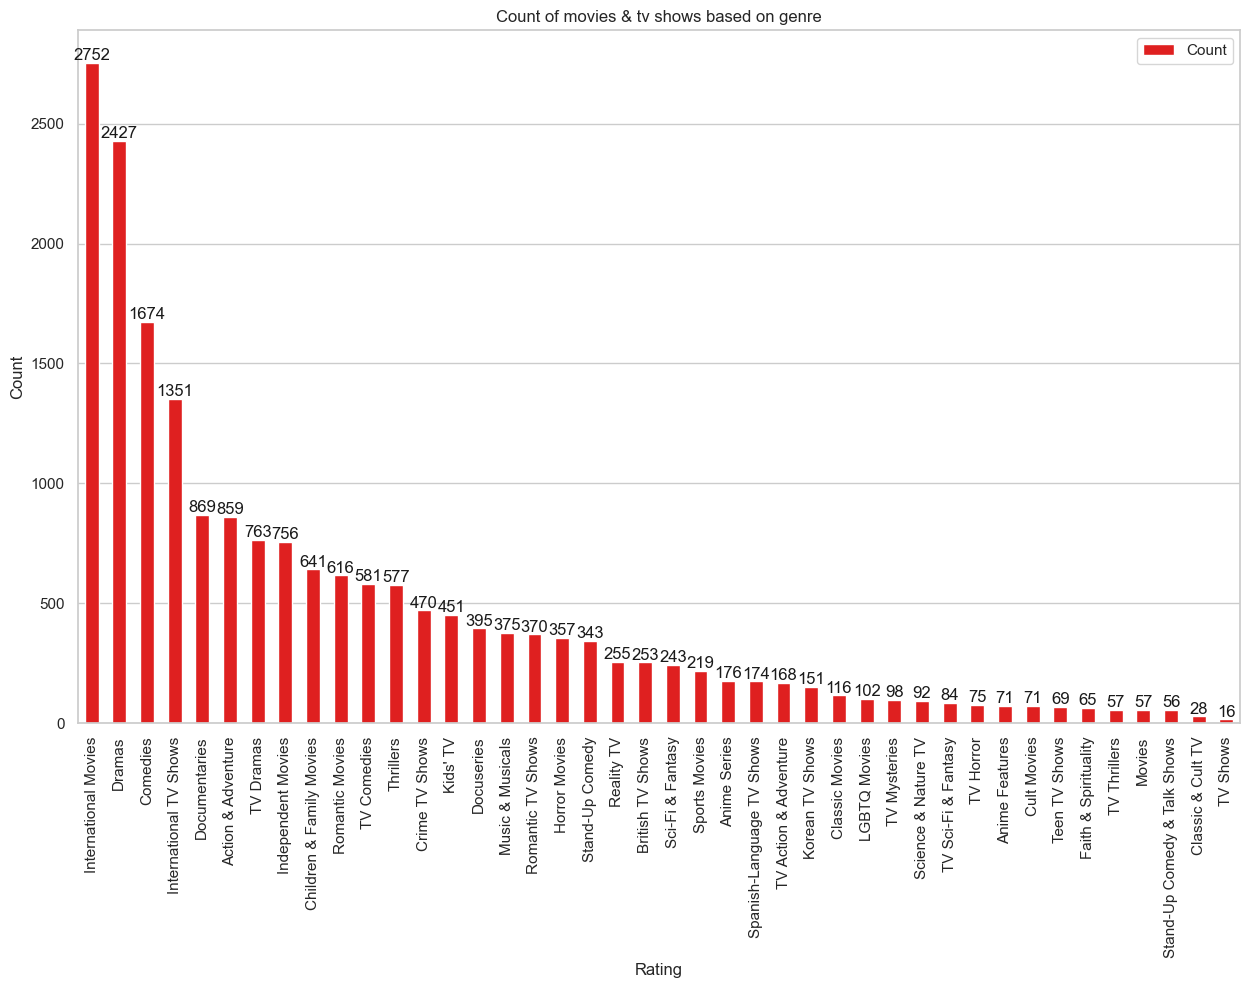

In [25]:
# Countplot of movies & tvshows based on genre
create_countplot(data=genre_count,
                     x='listed_in',
                     y='show_id',
                     title = "Count of movies & tv shows based on genre",
                     color='red',
                     width=0.5,
                     label='Count',
                     xlabel='Rating',
                     ylabel='Count',
                     legend_loc='upper right', rotation= 90)

In [26]:
# Count of Movies and Tv Shows based on rating
rating_count = df.groupby("rating")["show_id"].nunique().sort_values(ascending=False)

rating_count = rating_count.reset_index()

rating_count

,rating,show_id
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


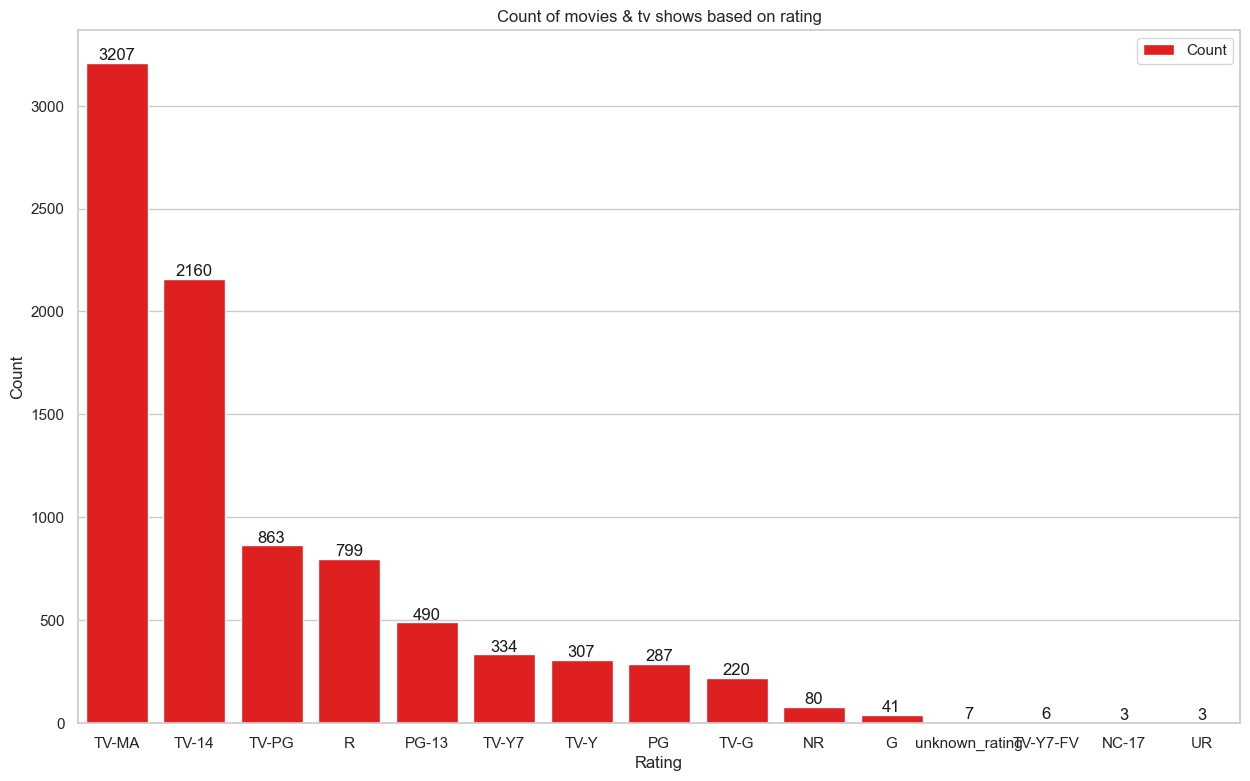

In [27]:
# Countplot of movies & tvshows based on rating
create_countplot(data=rating_count,
                     x='rating',
                     y='show_id',
                     title = "Count of movies & tv shows based on rating",
                     color='red',
                     width=0.8,
                     label='Count',
                     xlabel='Rating',
                     ylabel='Count',
                     legend_loc='upper right', rotation=0)

**Insights:**
    
- The most common ratings appear to be "TV-MA" and "TV-14," with 3207 and 2160 shows or movies, respectively. These ratings are often associated with content that is suitable for mature audiences.<br><br>

- Ratings like "TV-G" and "G" suggest that there is content suitable for a general audience, including children.<br><br>

- Ratings like "NC-17," "UR," "TV-Y7-FV," and "NR" have a lower occurrence, indicating that there is less content associated with these ratings.


# Comparison of movies and TV Shows

In [28]:
# Top countries based on Movies
country_count_movie = movie_data.groupby("country")["show_id"].nunique().sort_values(ascending=False)

country_count_movie = country_count_movie.reset_index()

country_count_movie.head(10)

,country,show_id
0,United States,2751
1,India,962
2,United Kingdom,532
3,unknown_country,440
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114


In [29]:
# Top countries based on TV shows
country_count_tvshow = tvshow_data.groupby("country")["show_id"].nunique().sort_values(ascending=False)

country_count_tvshow = country_count_tvshow.reset_index()

country_count_tvshow.head(10)

,country,show_id
0,United States,938
1,unknown_country,391
2,United Kingdom,272
3,Japan,199
4,South Korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,66


In [30]:
top_country_movie = country_count_movie.head(10)
top_country_tvshow = country_count_tvshow.head(10)

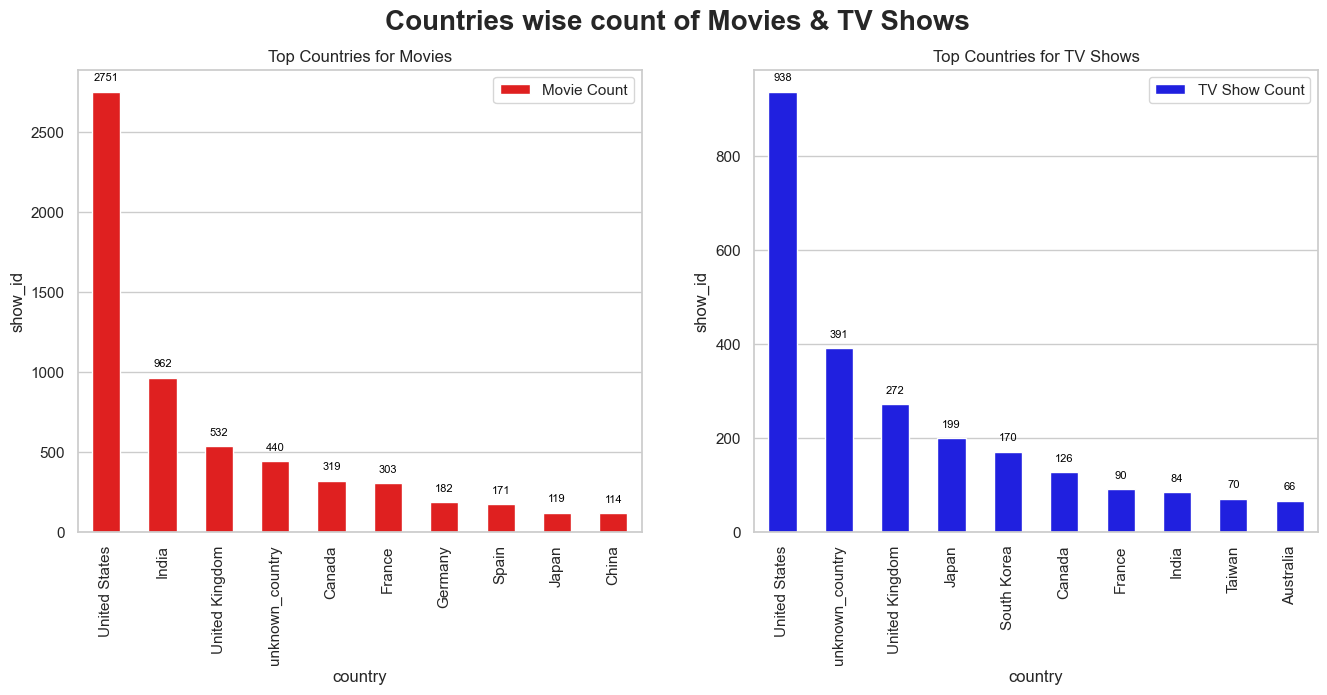

In [31]:
# Set the style and create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Set the overall title for the figure
fig.suptitle('Countries wise count of Movies & TV Shows',
             fontsize=20, fontweight="bold")

# Set individual titles for each subplot
axes[0].set_title("Top Countries for Movies")
axes[1].set_title("Top Countries for TV Shows")

# Created bar plots for Movies and TV Shows in each subplot
sns.barplot(data=top_country_movie,
            x='country',
            y='show_id',
            ax=axes[0],
            color='red',
            width=0.5,
            label='Movie Count')
sns.barplot(data=top_country_tvshow,
            x='country',
            y='show_id',
            ax=axes[1],
            color='blue',
            width=0.5,
            label='TV Show Count')

# Rotate x-axis labels to 90 degrees
for ax in axes:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Annotate show_id values on the bars
for ax in axes:    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.show()

**Insights:**
    
- The United States has the highest number of both movies and TV shows on Netflix. This could be expected, as Netflix originated in the United States and has a significant focus on its domestic market.<br><br>

 - The data shows a diverse selection of countries with a notable presence in Netflix's content library, including India, the United Kingdom, Canada, France, Germany, Spain, Japan, China, South Korea, Taiwan, and Australia.<br><br>


 - For movies, India and the United Kingdom follow the United States in terms of the number of titles available.<br><br>
 - For TV shows, there is a strong presence from the United States, the United Kingdom, and Japan.


# Best time to launch a Movie or Tv Show

In [32]:
# Extracting the week from the 'date_added' column

movie_data['release_week'] = movie_data['date_added'].dt.isocalendar().week

tvshow_data['release_week'] = tvshow_data['date_added'].dt.isocalendar().week

In [33]:
movie_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38
1,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,unknown_country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38


In [34]:
tvshow_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_week
0,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38


In [35]:
movie_per_week = movie_data.groupby("release_week")["show_id"].nunique()

movie_per_week = movie_per_week.reset_index(name = "Movies")

movie_per_week.sort_values(by="Movies",ascending=False).head(10) #Top 10 weeks based on no.of movies released

,release_week,Movies
0,1,316
43,44,243
39,40,215
8,9,207
25,26,195
34,35,189
30,31,185
12,13,174
17,18,173
26,27,154


In [36]:
tvshow_per_week = tvshow_data.groupby("release_week")["show_id"].nunique()

tvshow_per_week = tvshow_per_week.reset_index(name = "Tv Shows")

tvshow_per_week.sort_values(by="Tv Shows",ascending=False).head(10) #Top 10 weeks based on no.of movies released

,release_week,Tv Shows
0,1,150
26,27,85
30,31,79
23,24,75
34,35,73
12,13,73
39,40,69
25,26,69
4,5,68
36,37,67


Text(0, 0.5, 'Number of Contents Released')

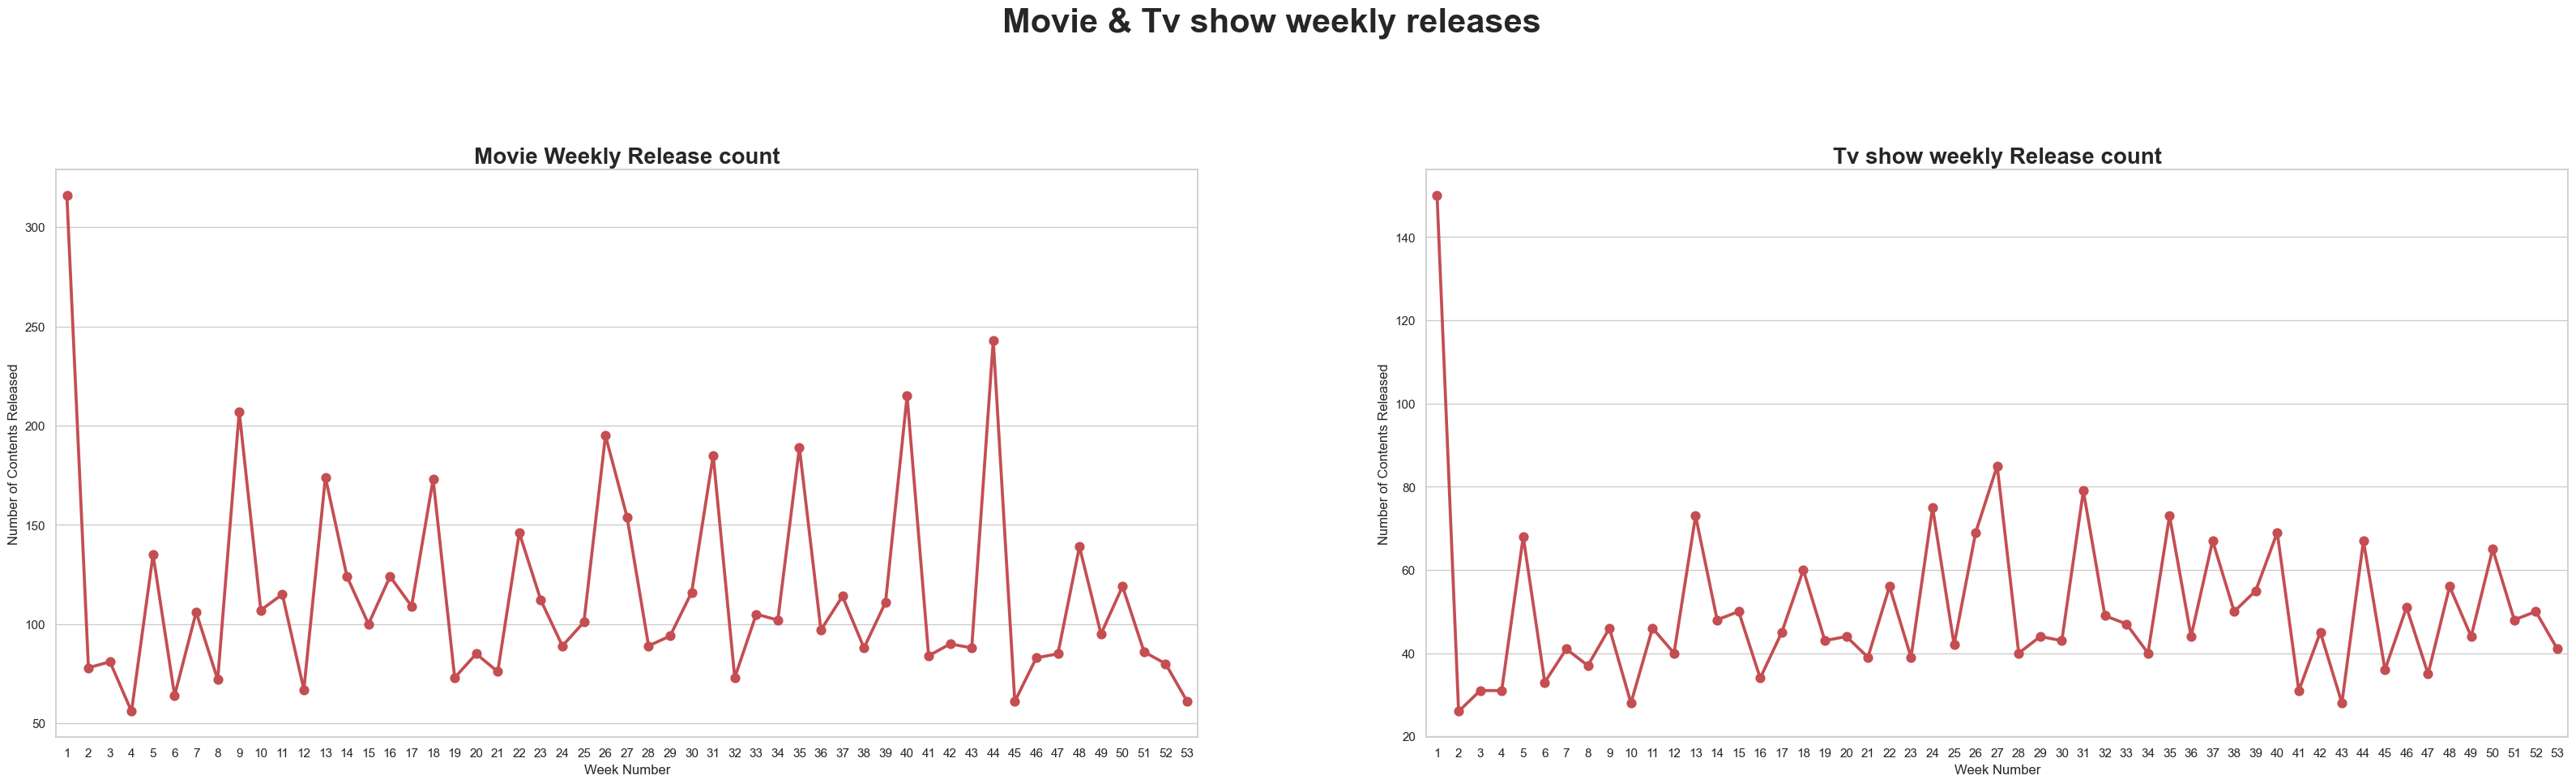

In [37]:
plt.figure(figsize=(40, 20))
plt.suptitle('Movie & Tv show weekly releases', fontsize=30, fontweight='bold', x=0.5)

# Subplot 1: Movie Weekly Releases count
plt.subplot(2, 2, 1)
sns.pointplot(data=movie_per_week, x='release_week', y='Movies', color='r')
plt.title('Movie Weekly Release count', fontsize=20, fontweight='semibold')
plt.xlabel('Week Number')
plt.ylabel('Number of Contents Released')

# Subplot 2: tvshow weekly Releases count
plt.subplot(2,2,2)
sns.pointplot(data=tvshow_per_week, x='release_week', y='Tv Shows', color='r')
plt.title('Tv show weekly Release count', fontsize=20, fontweight='semibold')
plt.xlabel('Week Number')
plt.ylabel('Number of Contents Released')

**Insights:**
    
- The week with the highest number of movie releases is Week 1, with 316 movies.<br><br>

- The top weeks following Week 1 are 44, 40, and 9, with 243, 215, and 207 movies released, respectively.<br><br>

- Weeks 26, 27, and 30 also had a relatively high number of TV show releases (120, 120, and 95, respectively). These weeks could be considered as consistently good weeks for launching TV shows.


In [38]:
# Assuming 'date_added' is a datetime column
movie_data['release_month'] = movie_data['date_added'].dt.month

movie_data.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_week,release_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9
1,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,unknown_country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9


In [39]:
# Group by 'release_month' and count unique 'show_id'
movie_per_month = movie_data.groupby("release_month")["show_id"].nunique()

# Sort the Series by the index (release_month)
movie_per_month = movie_per_month.sort_index().reset_index(name = "Movies")

month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}

movie_per_month['release_month'] = movie_per_month['release_month'].map(month_names)

# Display the updated DataFrame
movie_per_month

,release_month,Movies
0,January,546
1,February,382
2,March,529
3,April,550
4,May,439
5,June,492
6,July,565
7,August,519
8,September,519
9,October,545


In [40]:
# Assuming 'date_added' is a datetime column
tvshow_data['release_month'] = tvshow_data['date_added'].dt.month

tvshow_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_week,release_month
0,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9


In [41]:
# Group by 'release_month' and count unique 'show_id'
tvshow_per_month = tvshow_data.groupby("release_month")["show_id"].nunique()

# Sort the Series by the index (release_month)
tvshow_per_month = tvshow_per_month.sort_index().reset_index(name = "TV shows")

month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}

tvshow_per_month['release_month'] = tvshow_per_month['release_month'].map(month_names)

# Display the updated DataFrame
tvshow_per_month

,release_month,TV shows
0,January,279
1,February,175
2,March,205
3,April,209
4,May,187
5,June,232
6,July,254
7,August,230
8,September,246
9,October,210


In [42]:
tvshow_per_month.dtypes

release_month    object
TV shows          int64
dtype: object

Text(0, 0.5, 'Number of Contents Released')

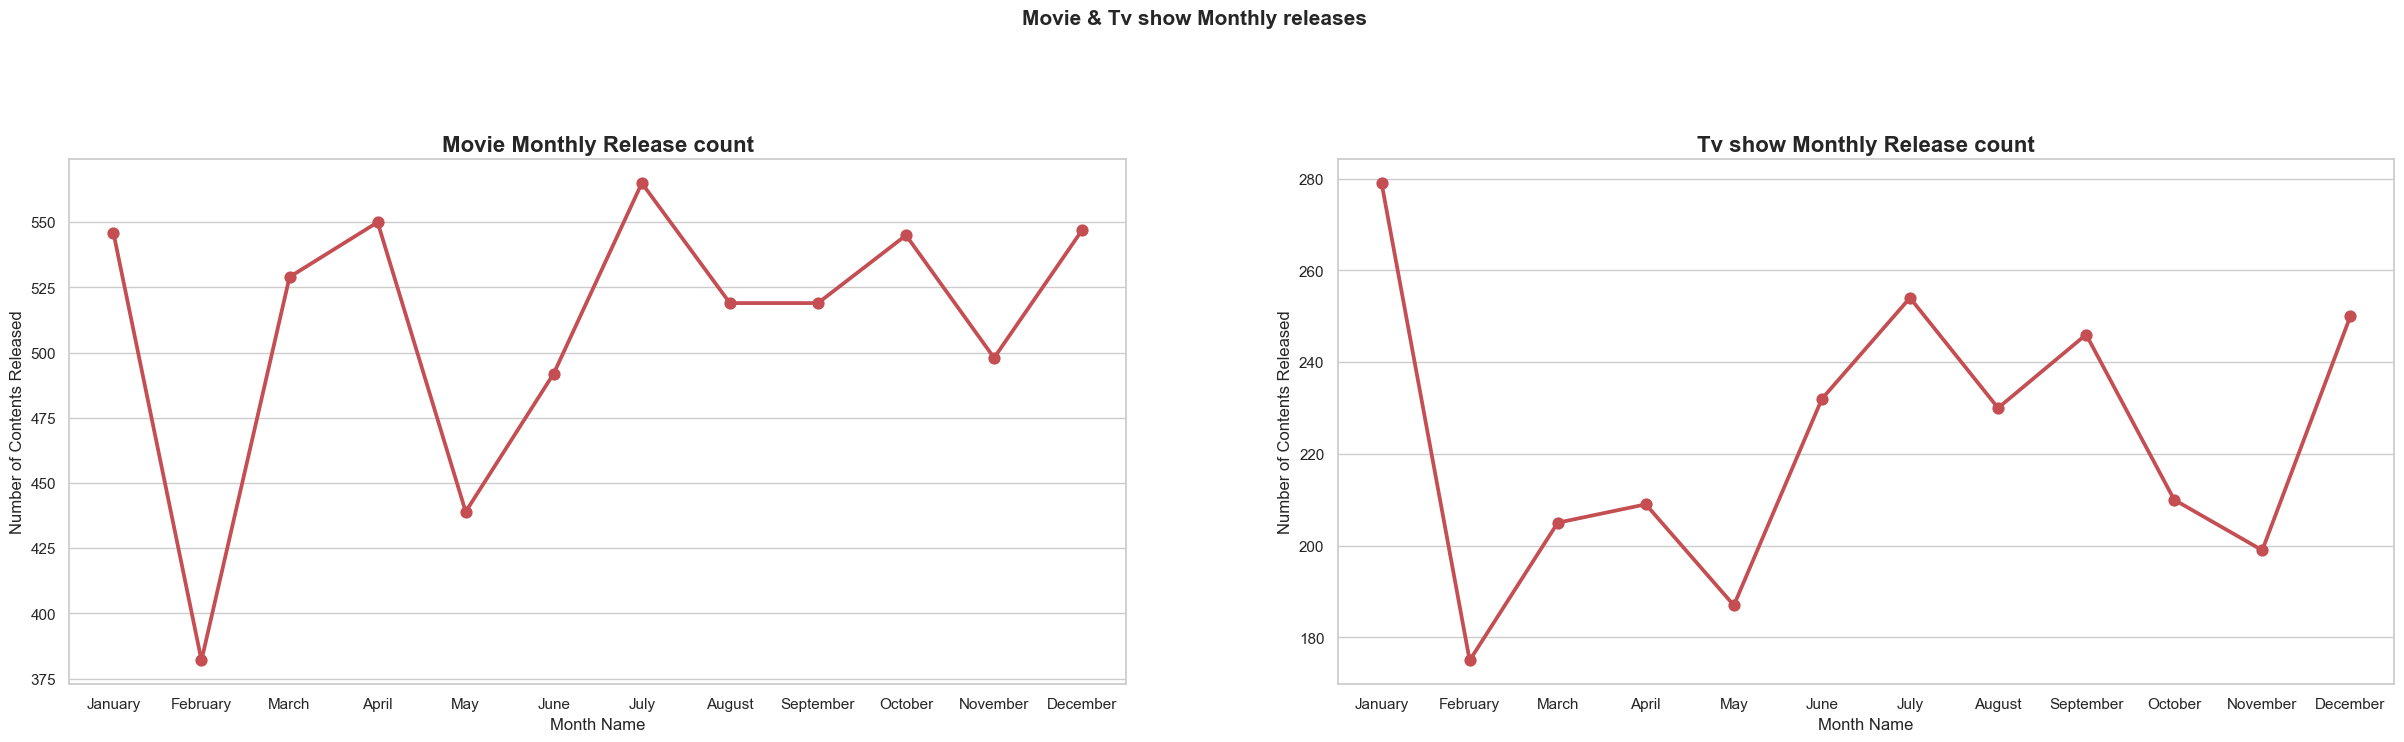

In [43]:
plt.figure(figsize=(30, 15))
plt.suptitle('Movie & Tv show Monthly releases', fontsize=15, fontweight='bold', x=0.5)

# Subplot 1: Movie Weekly Releases count
plt.subplot(2, 2, 1)
sns.pointplot(data=movie_per_month, x='release_month', y='Movies', color='r')
plt.title('Movie Monthly Release count', fontsize=16, fontweight='semibold')
plt.xlabel('Month Name')
plt.ylabel('Number of Contents Released')

# Subplot 2: tvshow weekly Releases count
plt.subplot(2,2,2)
sns.pointplot(data=tvshow_per_month, x='release_month', y='TV shows', color='r')
plt.title('Tv show Monthly Release count', fontsize=16, fontweight='semibold')
plt.xlabel('Month Name')
plt.ylabel('Number of Contents Released')

**Insights:**
    
- Identify the months with the highest number of movie releases. In your data, July has the highest count (565), followed by October (545) and December (547). This suggests that these months are relatively popular for movie releases.<br><br>

- If certain months have high variability, it might indicate that they are riskier for releases, and factors like competition or audience behavior could be influencing the numbers.<br><br>

- There seems to be a peak in TV show releases during the middle of the year (June and July).<br><br>

- Months like February and November have a relatively lower number of releases.


# Top actors and directors of movies & TV shows

In [44]:
movie_actors = movie_data[movie_data["cast"] != "unknown_cast"].groupby("cast")["title"].nunique()

movie_actors = movie_actors.reset_index(name = "Title")

top_movie_actors = movie_actors.sort_values(by = "Title", ascending = False).head(10)

top_movie_actors

,cast,Title
2105,Anupam Kher,42
21781,Shah Rukh Khan,35
17193,Naseeruddin Shah,32
638,Akshay Kumar,30
18064,Om Puri,30
18329,Paresh Rawal,28
1313,Amitabh Bachchan,28
12031,Julie Tejwani,28
3354,Boman Irani,27
20692,Rupa Bhimani,27


In [45]:
tvshow_actors = tvshow_data[tvshow_data["cast"] != "unknown_cast"].groupby("cast")["title"].nunique()

tvshow_actors = tvshow_actors.reset_index(name = "Title")

top_tvshow_actors = tvshow_actors.sort_values(by = "Title", ascending = False).head(10)

top_tvshow_actors

,cast,Title
13230,Takahiro Sakurai,25
14580,Yuki Kaji,19
6804,Junichi Suwabe,17
2874,Daisuke Ono,17
252,Ai Kayano,17
14564,Yuichi Nakamura,16
14496,Yoshimasa Hosoya,15
6761,Jun Fukuyama,15
3127,David Attenborough,14
6918,Kana Hanazawa,13


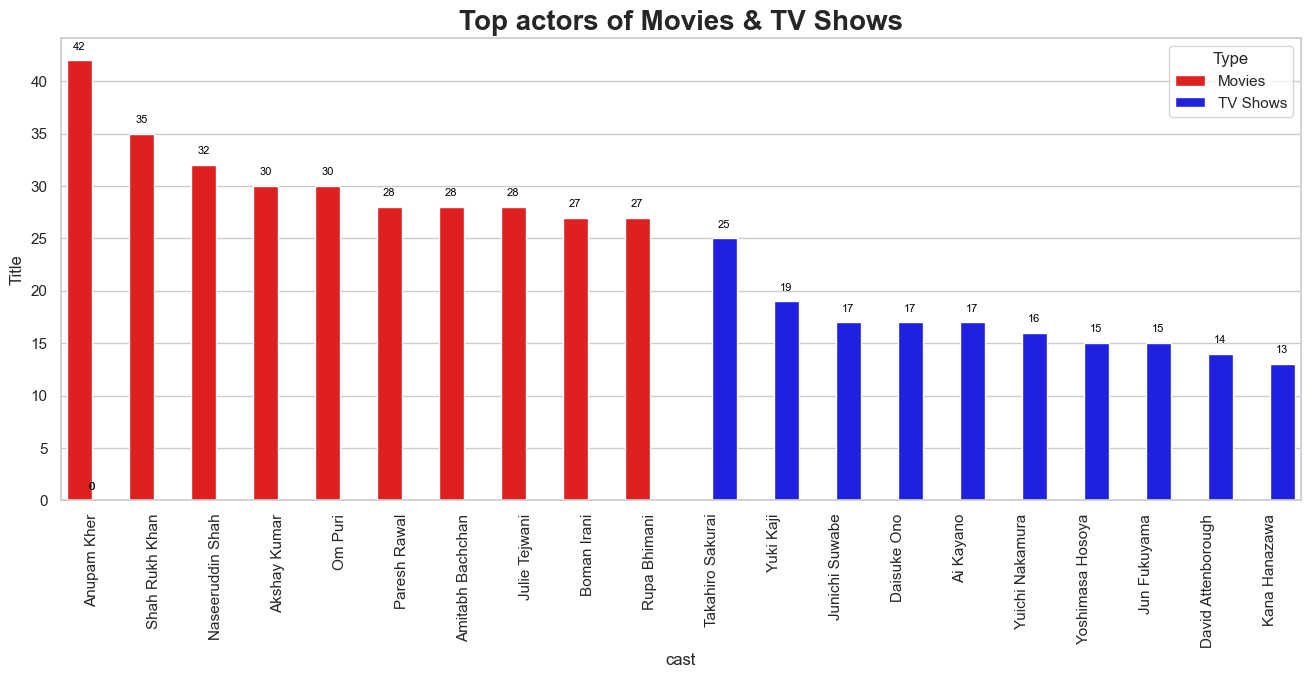

In [46]:
# Set the style and create subplots
plt.figure(figsize=(16, 6))
plt.title('Top actors of Movies & TV Shows', fontsize=20, fontweight="bold")

# Combine the data for Movies and TV Shows
combined_directors = pd.concat([top_movie_actors.assign(Type='Movies'), top_tvshow_actors.assign(Type='TV Shows')])

# Create a bar plot with hue for Type (Movies or TV Shows)
sns.barplot(data=combined_directors,
            x='cast',
            y='Title',
            hue='Type',
            palette={'Movies': 'red', 'TV Shows': 'blue'},
            dodge=True)  # Separate bars for Movies and TV Shows

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)

# Annotate show_id values on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.show()

**Insights:**

**Movies**
    
- Anupam Kher, with 42 titles, holds the top position among the actors with the most content on Netflix. Akshay Kumar and Om Puri are tied with 30 titles each, indicating their substantial presence on the platform.<br><br>

- Bollywood legends like Shah Rukh Khan, Amitabh Bachchan, and Naseeruddin Shah share the spotlight with versatile actors like Akshay Kumar and Boman Irani.<br><br>

- The presence of different talents suggests that Netflix caters to a broad audience, offering a variety of films and shows featuring renowned actors.<br><br>

**TV Shows:**

- The list predominantly consists of Japanese actors, such as Takahiro Sakurai, Yuki Kaji, Junichi Suwabe, Daisuke Ono, and others. This suggests a significant presence of Japanese TV shows on Netflix, or these actors might have a strong association with popular Japanese content available on the platform.<br><br>

- The diversity in these counts indicates that these actors have participated in a varied range of TV shows available on the platform.<br><br>

- While there is a strong presence of Japanese actors, the inclusion of non-Japanese actors like David Attenborough suggests that Netflix's content has international appeal.<br><br>


In [47]:
movie_directors = movie_data[movie_data["director"] != "unknown_director"].groupby("director")["title"].nunique()

movie_directors = movie_directors.reset_index(name = "Title")

top_movie_directors = movie_directors.sort_values(by = "Title", ascending = False).head(10)

top_movie_directors

,director,Title
3582,Rajiv Chilaka,22
1817,Jan Suter,21
3633,Raúl Campos,19
4261,Suhas Kadav,16
2739,Marcus Raboy,15
1862,Jay Karas,15
727,Cathy Garcia-Molina,13
1859,Jay Chapman,12
2815,Martin Scorsese,12
4725,Youssef Chahine,12


In [48]:
tvshow_directors = tvshow_data[tvshow_data["director"] != "unknown_director"].groupby("director")["title"].nunique()

tvshow_directors = tvshow_directors.reset_index(name = "Title")

top_tvshow_directors = tvshow_directors.sort_values(by = "Title", ascending = False).head(10)

top_tvshow_directors

,director,Title
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
140,Jung-ah Im,2
128,Joe Berlinger,2
100,Hsu Fu-chun,2
84,Gautham Vasudev Menon,2
168,Lynn Novick,2
103,Iginio Straffi,2
251,Shin Won-ho,2


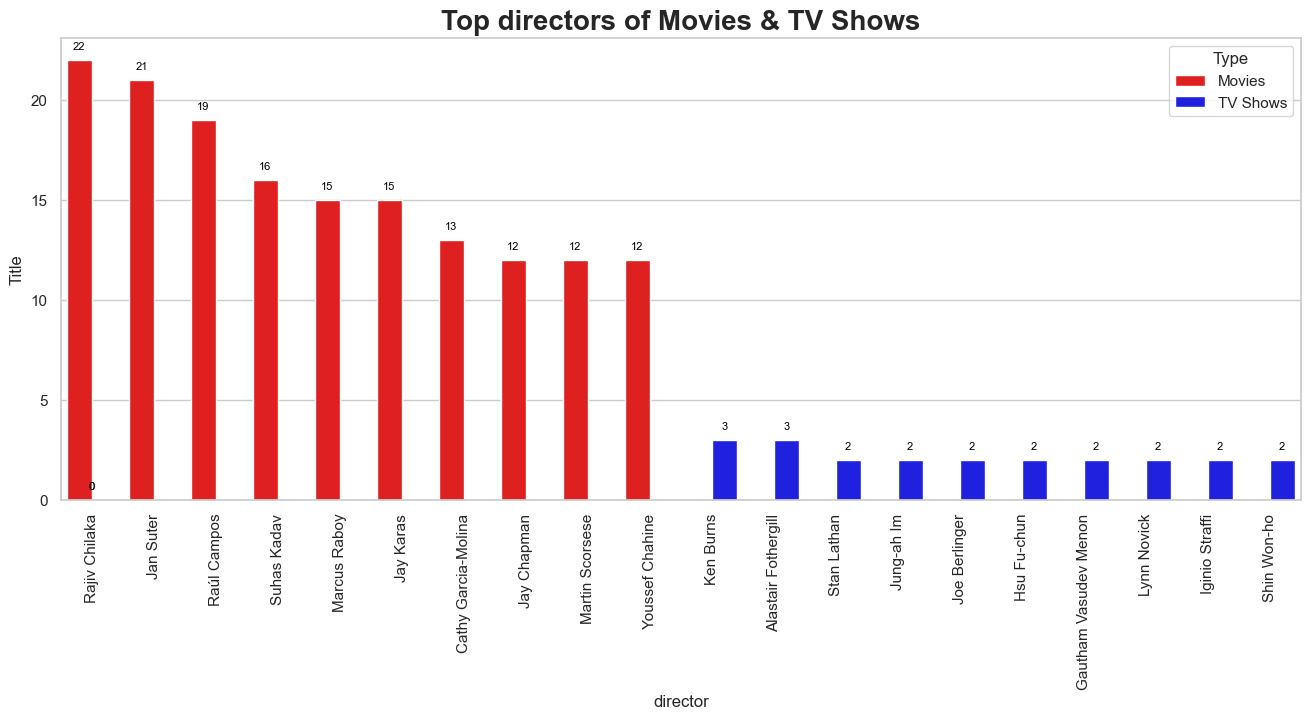

In [49]:
# Set the style and create subplots
plt.figure(figsize=(16, 6))
plt.title('Top directors of Movies & TV Shows', fontsize=20, fontweight="bold")

# Combine the data for Movies and TV Shows
combined_directors = pd.concat([top_movie_directors.assign(Type='Movies'), top_tvshow_directors.assign(Type='TV Shows')])

# Create a bar plot with hue for Type (Movies or TV Shows)
sns.barplot(data=combined_directors,
            x='director',
            y='Title',
            hue='Type',
            palette={'Movies': 'red', 'TV Shows': 'blue'},
            dodge=True)  # Separate bars for Movies and TV Shows

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)

# Annotate show_id values on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.show()

**Movies:**

- Rajiv Chilaka is the top director in the dataset, having directed 22 movies available on Netflix.<br><br>

- The numbers represent the count of movies attributed to each director, indicating their prolific involvement in the film industry.<br><br>

**TV Shows:**

- Ken Burns is the top director with the highest number of TV shows in the dataset, contributing to 3 TV shows available on Netflix.<br><br>

- Directors like Ken Burns and Alastair Fothergill stand out for having the highest number of TV shows in the dataset, contributing to the diversity of content on the platform.<br><br>


# Word cloud based on the genre 

In [50]:
from wordcloud import WordCloud

In [51]:
wc_moviedata = movie_data.groupby("listed_in")["show_id"].nunique().sort_values(ascending = False).reset_index()

In [52]:
wc_moviedata

,listed_in,show_id
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


In [53]:
wc_tvshowdata = tvshow_data.groupby("listed_in")["show_id"].nunique().sort_values(ascending = False)

wc_tvshowdata = wc_tvshowdata.reset_index()

wc_tvshowdata

,listed_in,show_id
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


In [54]:
def generate_wordcloud(data, title, colormap):
    wordcloud = WordCloud(width=1600,
                          height=800,
                          background_color='black',
                          colormap=colormap).generate(data)
    
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14, fontweight='bold', fontfamily='Arial')
    plt.show()

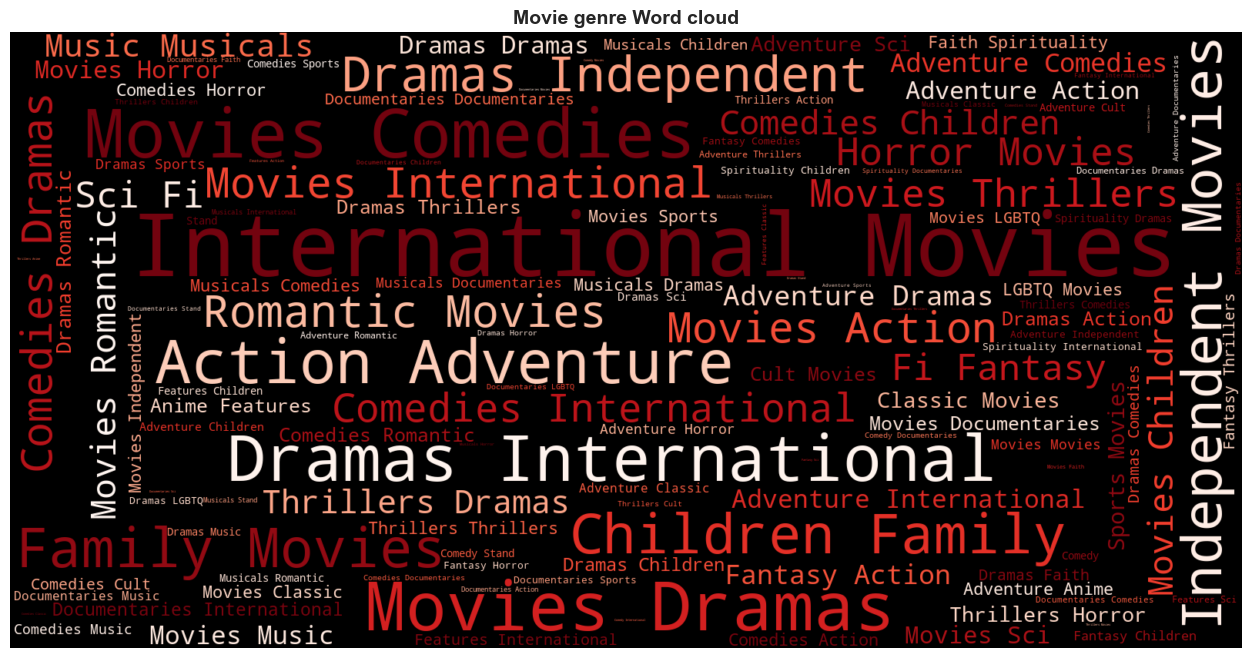

In [55]:
generate_wordcloud(movie_data.listed_in.to_string(), "Movie genre Word cloud", 'Reds')

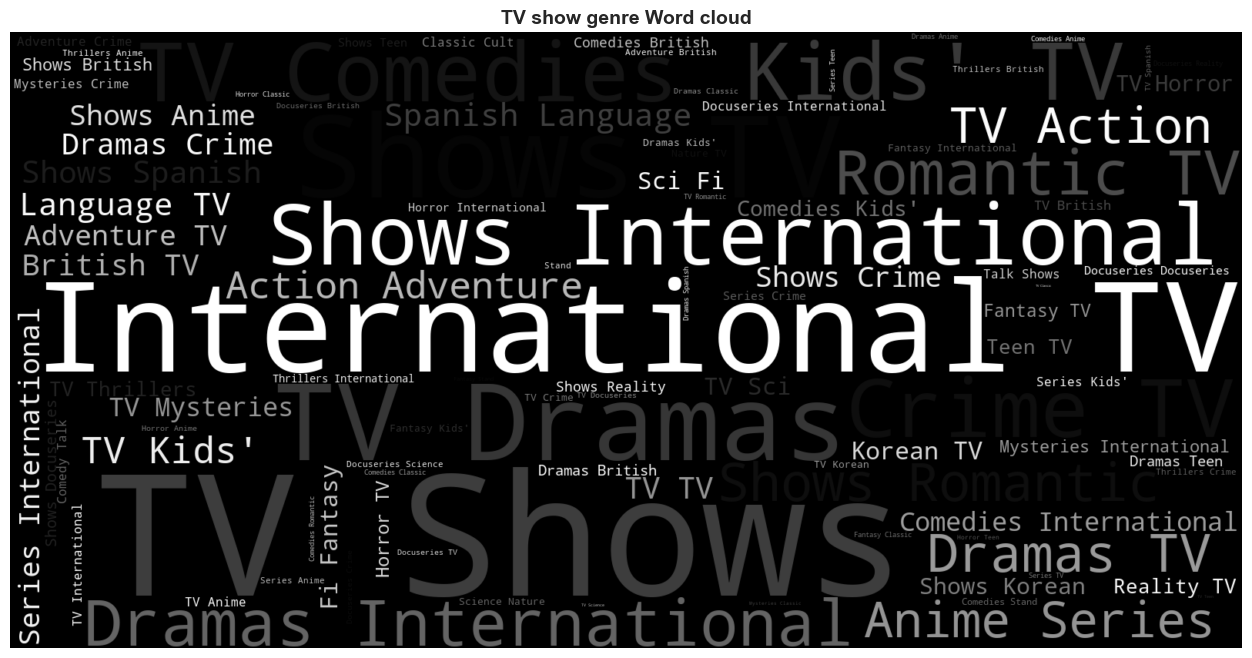

In [56]:
generate_wordcloud(tvshow_data.listed_in.to_string(), "TV show genre Word cloud", 'Greys')

# Better time to add a movie in netflix

In [57]:
movie_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_week,release_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9
1,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,unknown_country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9


**Note :**
- I can convert the release year to datetime format but it will give the Jan
  1, release_year for all the rows which will affect the analysis as all the contents will
  be released on Jan 1st of every year.<br><br>
- so we will proceed with the yearwise directly... if the Time_diff is zero it means the
  content is added to OTT on the same year with some months or days difference

In [58]:
movie_data['year_added'] = movie_data['date_added'].dt.isocalendar().year.astype(int)

In [59]:
unique_movie_data = movie_data[['show_id','title','release_year', 'year_added']].drop_duplicates()

In [60]:
unique_movie_data.shape

(6131, 4)

In [61]:
unique_movie_data['year_difference'] = unique_movie_data['year_added'] - unique_movie_data['release_year']

In [62]:
unique_movie_data.head()

,show_id,title,release_year,year_added,year_difference
0,s1,Dick Johnson Is Dead,2020,2021,1
1,s7,My Little Pony: A New Generation,2021,2021,0
21,s8,Sankofa,1993,2021,28
165,s10,The Starling,2021,2021,0
187,s13,Je Suis Karl,2021,2021,0


In [63]:
year_difference_mode = unique_movie_data['year_difference'].mode()[0]

year_difference_mode

0

**Insights:**
- Time difference is ZERO indicating that the contents are added to the netflix library
  within the same year.<br><br>
- The contents are added to the Netflix OTT platform within some months or days of
  release.

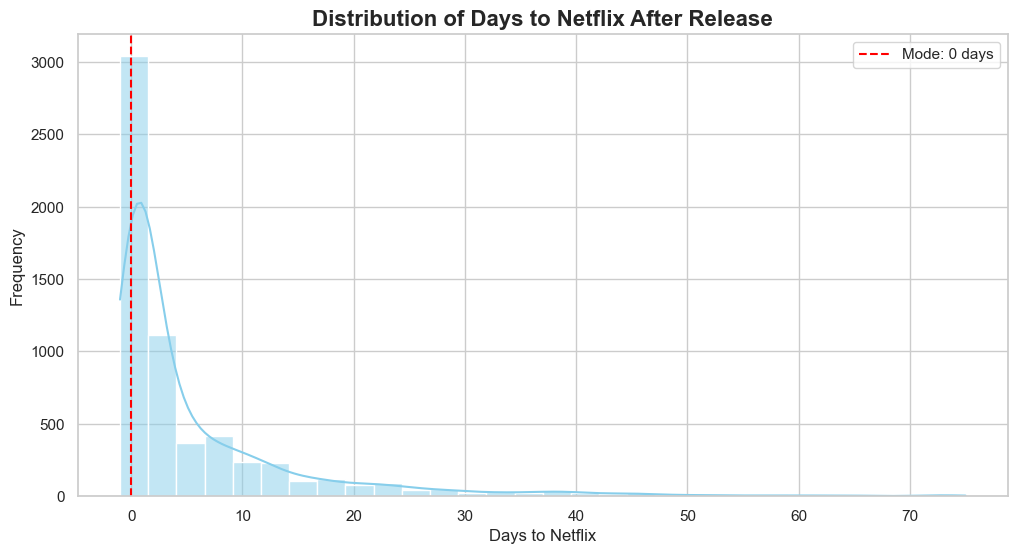

In [64]:
# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(unique_movie_data['year_difference'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Days to Netflix After Release', fontsize=16, fontweight='bold')
plt.xlabel('Days to Netflix')
plt.ylabel('Frequency')

# Adding vertical line for the mode
plt.axvline(x=year_difference_mode, color='red', linestyle='--', label=f'Mode: {year_difference_mode} days')

plt.legend()
plt.show()

**Insights**

- In adherence to current agreements, content is introduced to the Netflix OTT platform within a span of months or days post-release.<br><br> 

- According to recent terms, Netflix secures telecasting rights approximately four weeks after the initial release of movies.<br><br>

- In contemporary practices, new TV show content is swiftly uploaded to OTT platforms, including Netflix, within a mere 24 hours after its original airing on television.<br><br>

- This streamlined approach aligns with the evolving landscape of content consumption and distribution.<br><br>


# Recommendations based on the above data

1. **Cultivate A-List Collaborations:**
   - Netflix should actively pursue collaborations with esteemed actors and directors, fostering strong partnerships to enhance the overall quality of content. This strategic move not only elevates artistic value but also resonates with a diverse global audience, contributing to both cultural richness and financial success.<br><br>

2. **Strategic Global Expansion:**
   - To sustain growth, Netflix needs to identify untapped markets globally, strategically expanding its subscriber base. By pinpointing regions with substantial growth potential, the streaming giant can minimize competition from other platforms, ensuring a more prominent market presence and increased subscriber acquisition.<br><br>

3. **Elevate Content Rating Priority:**
   - Recognizing the impact of content ratings on viewer preferences, Netflix should prioritize and amplify the importance of content ratings. This strategic emphasis will attract a broader spectrum of subscribers, fostering trust and alignment with nuanced audience preferences.<br><br>

4. **Innovative Ad-Supported Tier Introduction:**
   - Netflix could introduce a lower-priced ad-supported subscription tier, strategically broadening its subscriber demographic. This move not only caters to a wider market segment but also generates additional revenue streams, ensuring financial sustainability.<br><br>

5. **Personalized User Journeys:**
   - Enhancing user experiences, Netflix should personalize content recommendations based on individual viewing histories. Introducing flexible pricing plans that cater to diverse user needs and amplifying content diversity within specific genres ensures a tailored and engaging platform for subscribers.<br><br>

6. **Revamped User Interface Experience:**
   - Netflix's user interface should undergo refinement to streamline content discovery, especially for hidden gems in the library. An improved cross-device navigation system will provide an uninterrupted and seamless viewing experience, enhancing overall user satisfaction.<br><br>

7. **Strategic Partnerships and Content Diversification:**
   - Exploring symbiotic alliances with external entities can elevate Netflix's content offerings. The establishment of an in-house production unit for diversified content, spanning genres like anime, documentaries, and stand-up comedy, is a strategic move to attract a broader audience and maintain a competitive edge in the streaming landscape.<br><br>